<h1 class="text_center">Project description</h1><br>
We work for the OilyGiant mining company. Our task is to find the best place for a new well.

Steps to choose the location:
    - Collect the oil well parameters in the selected region: oil quality and volume of reserves;
    - Build a model for predicting the volume of reserves in the new wells;
    - Pick the oil wells with the highest estimated values;
    - Pick the region with the highest total profit for the selected oil wells.
We have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

<h3 class="text_center">Data description</h3>

**id** — unique oil well identifier<br>
**f0, f1, f2** — three features of points (their specific meaning is unimportant, but the features themselves are significant)<br>
**product** — volume of reserves in the oil well (thousand barrels).<br>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from tqdm.notebook import trange

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score





In [3]:
data_0 = pd.read_csv('./geo_data_0.csv')
data_1 = pd.read_csv('./geo_data_1.csv')
data_2 = pd.read_csv('./geo_data_2.csv')


In [4]:
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [5]:
data_0.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
data_0.duplicated().sum()

0

In [7]:
data_1.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
data_1.duplicated().sum()

0

In [9]:
data_2.isnull().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
data_2.duplicated().sum()

0

In [11]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [12]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Text(0.5, 0.98, 'region first')

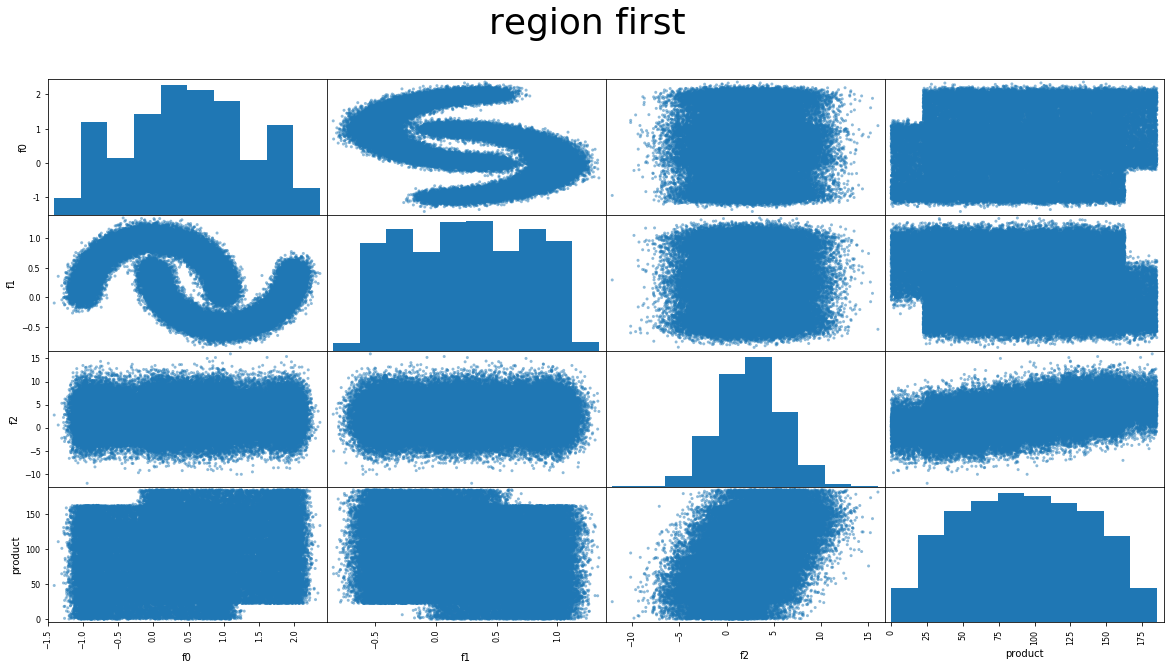

In [14]:
scatter_matrix(data_0, figsize=(20, 10))
plt.suptitle('region first', fontsize=36)

Text(0.5, 0.98, 'region second')

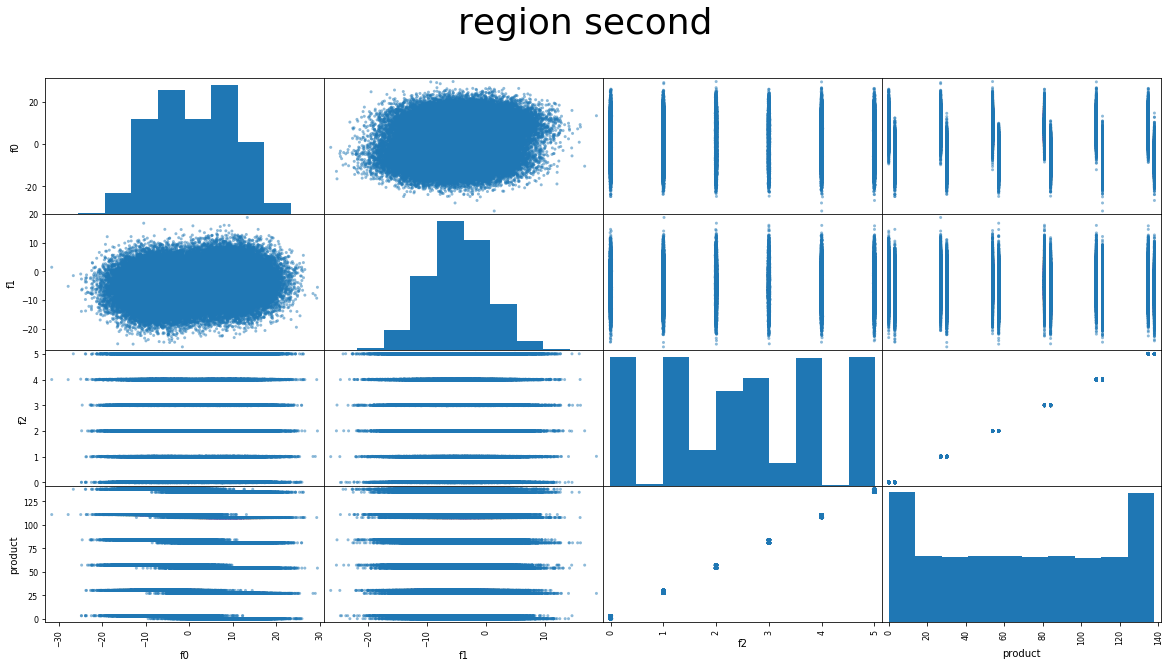

In [15]:
scatter_matrix(data_1, figsize=(20, 10))
plt.suptitle('region second', fontsize=36)

Text(0.5, 0.98, 'region third')

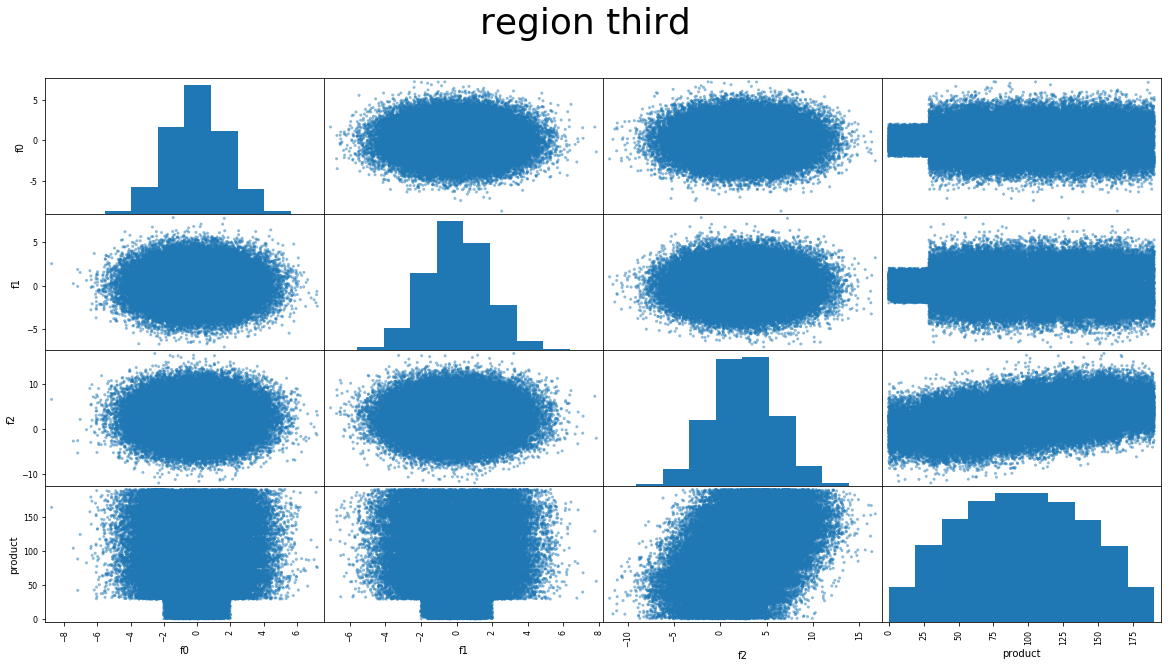

In [16]:
scatter_matrix(data_2, figsize=(20, 10))
plt.suptitle('region third', fontsize=36)

In [17]:
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']

features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

In [18]:
scaler_0 =  StandardScaler()
features_0_scaled = scaler_0.fit_transform(features_0.drop('id', axis=1))

scaler_1 =  StandardScaler()
features_1_scaled = scaler_1.fit_transform(features_1.drop('id', axis=1))

scaler_2 =  StandardScaler()
features_2_scaled = scaler_2.fit_transform(features_2.drop('id', axis=1))

In [19]:
features_train_0, features_test_0, target_train_0, target_test_0 = train_test_split(features_0_scaled, target_0, test_size=0.25, random_state=12345)

model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predicted_value_0 = model_0.predict(features_test_0)

score_rmse_0 = mean_squared_error(target_test_0, predicted_value_0) ** (1/2)

score_rmse_0


37.5794217150813

In [20]:
features_train_1, features_test_1, target_train_1, target_test_1 = train_test_split(features_1_scaled, target_1, test_size=0.25, random_state=12345)

model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predicted_value_1 = model_1.predict(features_test_1)

score_rmse_1 = mean_squared_error(target_test_1, predicted_value_1) ** (1/2)

score_rmse_1

0.8930992867756159

In [21]:
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(features_2_scaled, target_2, test_size=0.25, random_state=12345)

model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predicted_value_2 = model_2.predict(features_test_2)

score_rmse_2 = mean_squared_error(target_test_2, predicted_value_2) ** (1/2)

score_rmse_2

40.02970873393434

The zero region and the second region have the same prediction error on average, while the first region has a very small error. I wonder what this is related to, it is worth looking at the distribution of the number of barrels of oil in wells.

In [22]:
cost_per_unit = int(100000000 / 200)
revenue_per_unit = 4500
vol_not_los = round(cost_per_unit / revenue_per_unit, 2)
vol_not_los

111.11

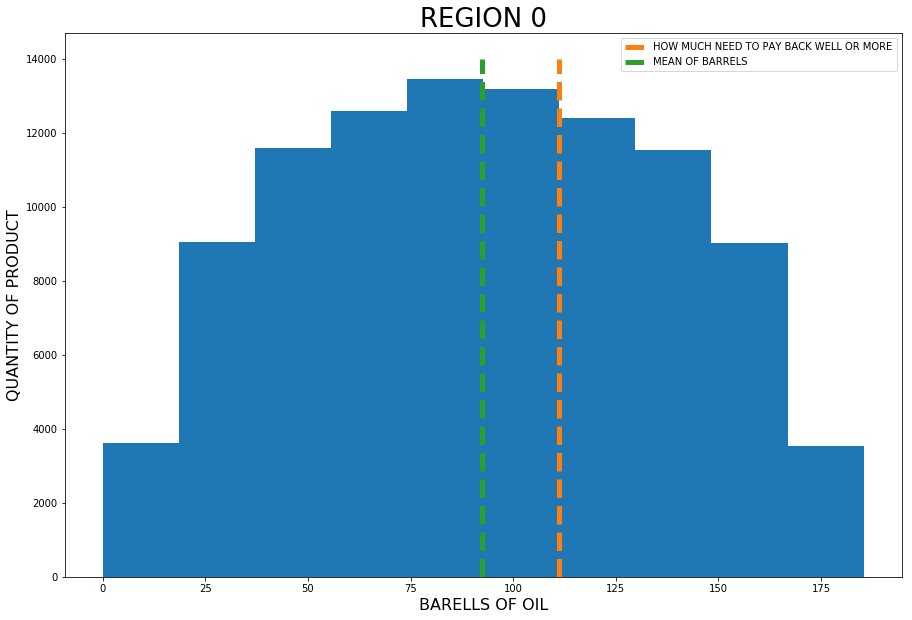

In [23]:
plt.figure(figsize=(15,10))
plt.hist(target_0)
plt.plot([vol_not_los for i in range(5)], np.linspace(0, 14000, 5), '--', linewidth=5)
plt.plot([target_0.mean() for i in range(5)], np.linspace(0, 14000, 5), '--', linewidth=5)

plt.title('REGION 0', fontsize=26)
plt.legend(['HOW MUCH NEED TO PAY BACK WELL OR MORE', 'MEAN OF BARRELS'])
plt.xlabel('BARELLS OF OIL', fontsize=16)
plt.ylabel('QUANTITY OF PRODUCT', fontsize=16)
plt.show()

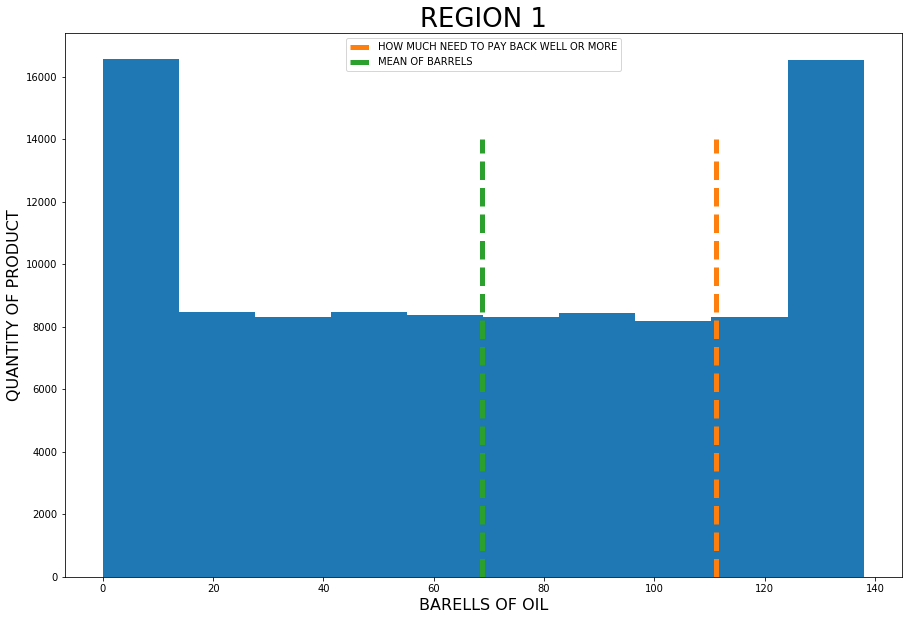

In [24]:
plt.figure(figsize=(15,10))
plt.hist(target_1)
plt.plot([vol_not_los for i in range(5)], np.linspace(0, 14000, 5), '--', linewidth=5)
plt.plot([target_1.mean() for i in range(5)], np.linspace(0, 14000, 5), '--', linewidth=5)

plt.title('REGION 1', fontsize=26)
plt.legend(['HOW MUCH NEED TO PAY BACK WELL OR MORE', 'MEAN OF BARRELS'])
plt.xlabel('BARELLS OF OIL', fontsize=16)
plt.ylabel('QUANTITY OF PRODUCT', fontsize=16)
plt.show()

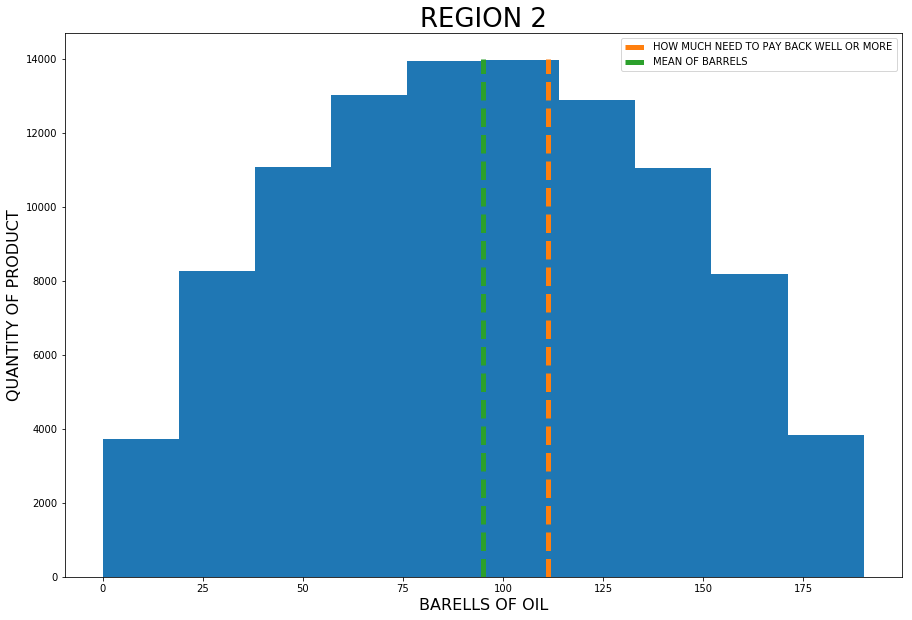

In [25]:
plt.figure(figsize=(15,10))
plt.hist(target_2)
plt.plot([vol_not_los for i in range(5)], np.linspace(0, 14000, 5), '--', linewidth=5)
plt.plot([target_2.mean() for i in range(5)], np.linspace(0, 14000, 5), '--', linewidth=5)

plt.title('REGION 2', fontsize=26)
plt.legend(['HOW MUCH NEED TO PAY BACK WELL OR MORE', 'MEAN OF BARRELS'])
plt.xlabel('BARELLS OF OIL', fontsize=16)
plt.ylabel('QUANTITY OF PRODUCT', fontsize=16)
plt.show()

The first conclusion that should be made is that on average, if you extract oil in all wells in one of the regions, it will not bring profits, but only losses. In other words, you should choose which wells to extract oil from.

In [27]:
def profit(target, predicted, count = 200, revenue_unit = 4500, cost_unit = 500000):
    predicted_sorted = pd.Series(predicted).sort_values(ascending=False)
    
    selected_target = pd.Series(target)[predicted_sorted.index][:count]
    
    revenue = sum(selected_target) * revenue_unit
    
    cost = count * cost_unit
    
    result = revenue - cost
    
    return round(result, 2)
    
    

In [28]:
profit_0 = profit(target_test_0.reset_index(drop=True), predicted_value_0)
profit_1 = profit(target_test_1.reset_index(drop=True), predicted_value_1)
profit_2 = profit(target_test_2.reset_index(drop=True), predicted_value_2)


If we produce only 200 wells, and even not in random ones, but in TEZ, that we predict a greater amount of raw materials, then we will receive income in each of the regions, which is shown below in the table and on the graph.

In [29]:
profits = pd.DataFrame(data=np.array([profit_0, profit_1, profit_2]).reshape(1,3), columns=['region_0', 'region_1', 'region_2'])
profits


,region_0,region_1,region_2
0,33208260.43,24150866.97,27103499.64


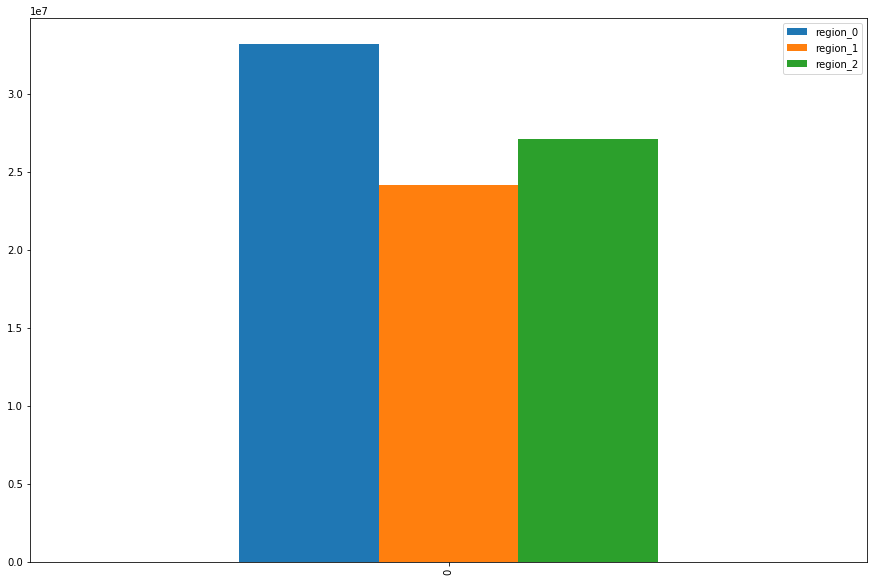

In [30]:
profits.plot.bar(figsize=(15,10))


Now let's build profit distributions for each region, taking random objects from the predicted values. Let's use the bootstrap aggregating method for this purpose.

In [31]:
state = np.random.RandomState(12345)

profit_0 = []
profit_1 = []
profit_2 = []

for i in range(1000):
    target_subsample = target_test_0.reset_index(drop=True).sample(500, replace=True, random_state=state)
    probabilities_subsample = pd.Series(predicted_value_0)[target_subsample.index]
    
    profit_0.append(profit(target_subsample, probabilities_subsample))
    
    target_subsample = target_test_1.reset_index(drop=True).sample(500, replace=True, random_state=state)
    probabilities_subsample = pd.Series(predicted_value_1)[target_subsample.index]
    
    profit_1.append(profit(target_subsample, probabilities_subsample))
    
    target_subsample = target_test_2.reset_index(drop=True).sample(500, replace=True, random_state=state)
    probabilities_subsample = pd.Series(predicted_value_2)[target_subsample.index]
    
    profit_2.append(profit(target_subsample, probabilities_subsample))
    

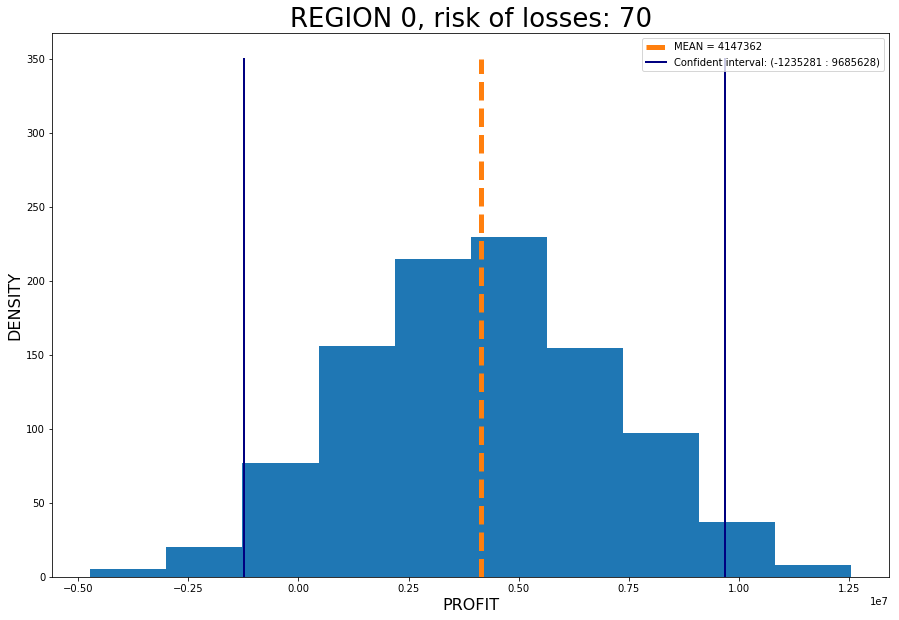

In [32]:
plt.figure(figsize=(15,10))
plt.hist(pd.Series(profit_0))
plt.plot([pd.Series(profit_0).mean() for i in range(5)], np.linspace(0, 350, 5), '--', linewidth=5)
plt.plot([pd.Series(profit_0).quantile(0.025) for i in range(5)], np.linspace(0, 350, 5), 'k-', lw=2, color='navy')
plt.plot([pd.Series(profit_0).quantile(0.975) for i in range(5)], np.linspace(0, 350, 5), 'k-', lw=2, color='navy')

plt.title('REGION 0, risk of losses: {}'.format((pd.Series(profit_0) < 0).sum()), fontsize=26)
plt.legend(['MEAN = {}'.format(int(pd.Series(profit_0).mean())), 'Confident interval: ({} : {})'.format(int(pd.Series(profit_0).quantile(0.025)), int(pd.Series(profit_0).quantile(0.975)))])
plt.xlabel('PROFIT', fontsize=16)
plt.ylabel('DENSITY', fontsize=16)
plt.show()

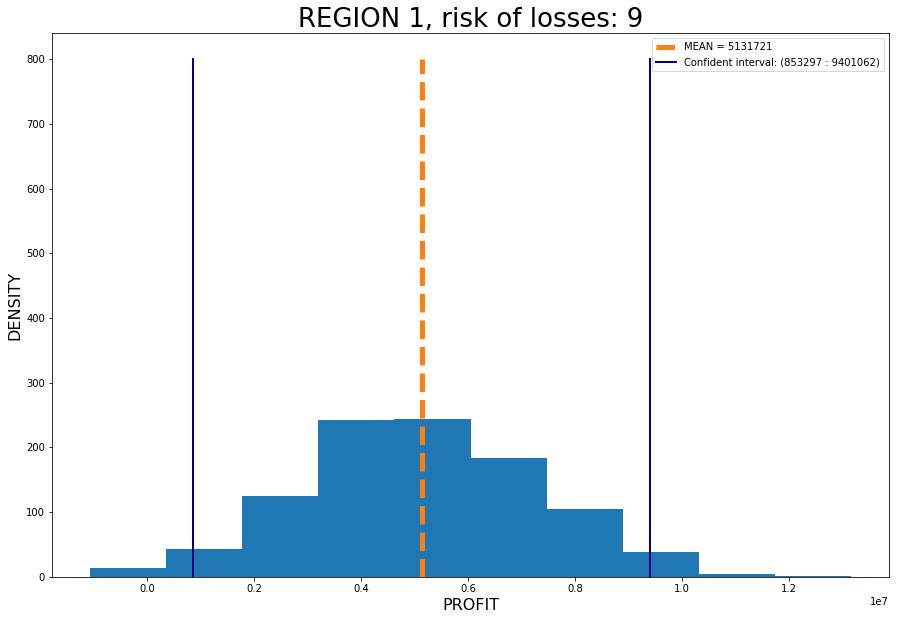

In [33]:
plt.figure(figsize=(15,10))
plt.hist(pd.Series(profit_1))
plt.plot([pd.Series(profit_1).mean() for i in range(5)], np.linspace(0, 800, 5), '--', linewidth=5)
plt.plot([pd.Series(profit_1).quantile(0.025) for i in range(5)], np.linspace(0, 800, 5), 'k-', lw=2, color='navy')
plt.plot([pd.Series(profit_1).quantile(0.975) for i in range(5)], np.linspace(0, 800, 5), 'k-', lw=2, color='navy')

plt.title('REGION 1, risk of losses: {}'.format((pd.Series(profit_1) < 0).sum()), fontsize=26)
plt.legend(['MEAN = {}'.format(int(pd.Series(profit_1).mean())), 'Confident interval: ({} : {})'.format(int(pd.Series(profit_1).quantile(0.025)), int(pd.Series(profit_1).quantile(0.975)))])
plt.xlabel('PROFIT', fontsize=16)
plt.ylabel('DENSITY', fontsize=16)
plt.show()

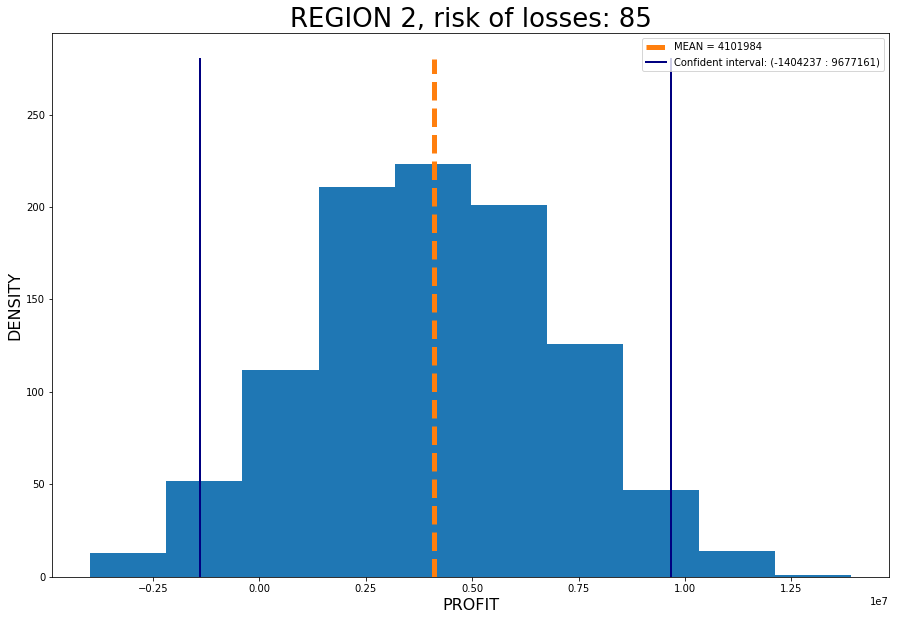

In [34]:
plt.figure(figsize=(15,10))
plt.hist(pd.Series(profit_2))
plt.plot([pd.Series(profit_2).mean() for i in range(5)], np.linspace(0, 280, 5), '--', linewidth=5)
plt.plot([pd.Series(profit_2).quantile(0.025) for i in range(5)], np.linspace(0, 280, 5), 'k-', lw=2, color='navy')
plt.plot([pd.Series(profit_2).quantile(0.975) for i in range(5)], np.linspace(0, 280, 5), 'k-', lw=2, color='navy')

plt.title('REGION 2, risk of losses: {}'.format((pd.Series(profit_2) < 0).sum()), fontsize=26)
plt.legend(['MEAN = {}'.format(int(pd.Series(profit_2).mean())), 'Confident interval: ({} : {})'.format(int(pd.Series(profit_2).quantile(0.025)), int(pd.Series(profit_2).quantile(0.975)))])
plt.xlabel('PROFIT', fontsize=16)
plt.ylabel('DENSITY', fontsize=16)
plt.show()

<h3 class="text_center">Conclusion</h3><br>
If you look closely at the values of the average and confidence intervals by region, you can draw a conclusion.
If you want to earn more, take a risk and dig in the zero region. Look for stability-dig in the first region. In any case, you will get profit everywhere.